In [5]:
import numpy as np
import pandas as pd
import os
for dirname, _, filenames in os.walk('heart.csv'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [6]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [7]:
sns.set_theme(context='notebook',
             style='whitegrid',
             palette='rainbow',
             font='Lucida Calligraphy',
             font_scale=1,
             color_codes=True,
             rc=None)
import matplotlib
matplotlib.rcParams['figure.figsize'] = [8, 8]
matplotlib.rcParams.update({'font.size' : 15})
matplotlib.rcParams['font.family'] = 'sans-serif'

In [8]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option("display.precision", 3)

In [9]:
heart = pd.read_csv('heart.csv')

In [10]:
heart.head().style.set_properties(**{'background-color':'blue',
                                    'color':'white',
                                    'border-color':'darkblack'})

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.000000,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.000000,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.000000,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.500000,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.000000,Up,0


In [11]:
#Cholesterol
Cholesterol = heart[heart['Cholesterol'] == 0]
Cholesterol

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
293,65,M,ASY,115,0,0,Normal,93,Y,0.0,Flat,1
294,32,M,TA,95,0,1,Normal,127,N,0.7,Up,1
295,61,M,ASY,105,0,1,Normal,110,Y,1.5,Up,1
296,50,M,ASY,145,0,1,Normal,139,Y,0.7,Flat,1
297,57,M,ASY,110,0,1,ST,131,Y,1.4,Up,1
298,51,M,ASY,110,0,1,Normal,92,N,0.0,Flat,1
299,47,M,ASY,110,0,1,ST,149,N,2.1,Up,1
300,60,M,ASY,160,0,1,Normal,149,N,0.4,Flat,1
301,55,M,ATA,140,0,0,ST,150,N,0.2,Up,0
302,53,M,ASY,125,0,1,Normal,120,N,1.5,Up,1


In [12]:
Cholesterol.shape

(172, 12)

In [13]:
MaxHR = heart[heart['MaxHR'] == 0]
MaxHR

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease


In [14]:
#Converting zero values of cholesterol to NaN values
heart.loc[heart['Cholesterol'] == 0, 'Cholesterol'] = np.nan
heart.head(1)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289.0,0,Normal,172,N,0.0,Up,0


In [15]:
heart["Cholesterol"] = heart["Cholesterol"].fillna(heart["Cholesterol"].median())

In [16]:
#Resting BP is the blood pressure of patients
RestingBP = heart[heart['RestingBP'] == 0]
RestingBP

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
449,55,M,NAP,0,237.0,0,Normal,155,N,1.5,Flat,1


In [18]:
heart = heart.drop(heart[heart['RestingBP'] == 0].index)

In [19]:
heart.dtypes

Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol       float64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object

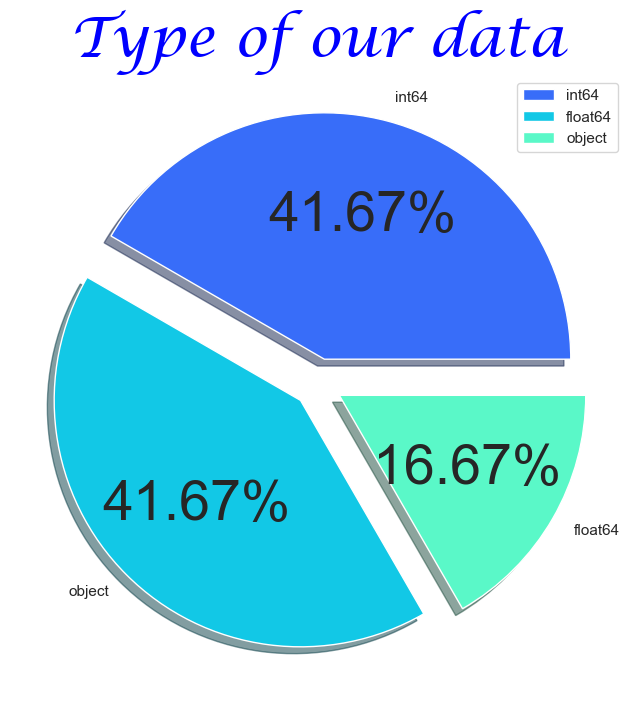

In [21]:
matplotlib.rcParams.update({'font.size' : 40})
heart.dtypes.value_counts().plot.pie(explode=[0.1,0.1,0.1],autopct='%1.2f%%',shadow=True)
plt.title('Type of our data', fontsize = 40, color='Blue', font='Lucida Calligraphy')
plt.legend(labels=['int64','float64','object'])
plt.axis('off');

In [22]:
numerical = heart.select_dtypes(include=['int64','float64']).columns
print(numerical)

Index(['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak',
       'HeartDisease'],
      dtype='object')


In [23]:
categorical = heart.select_dtypes(include=['object']).columns
print(categorical)

Index(['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope'], dtype='object')


In [24]:
heart.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

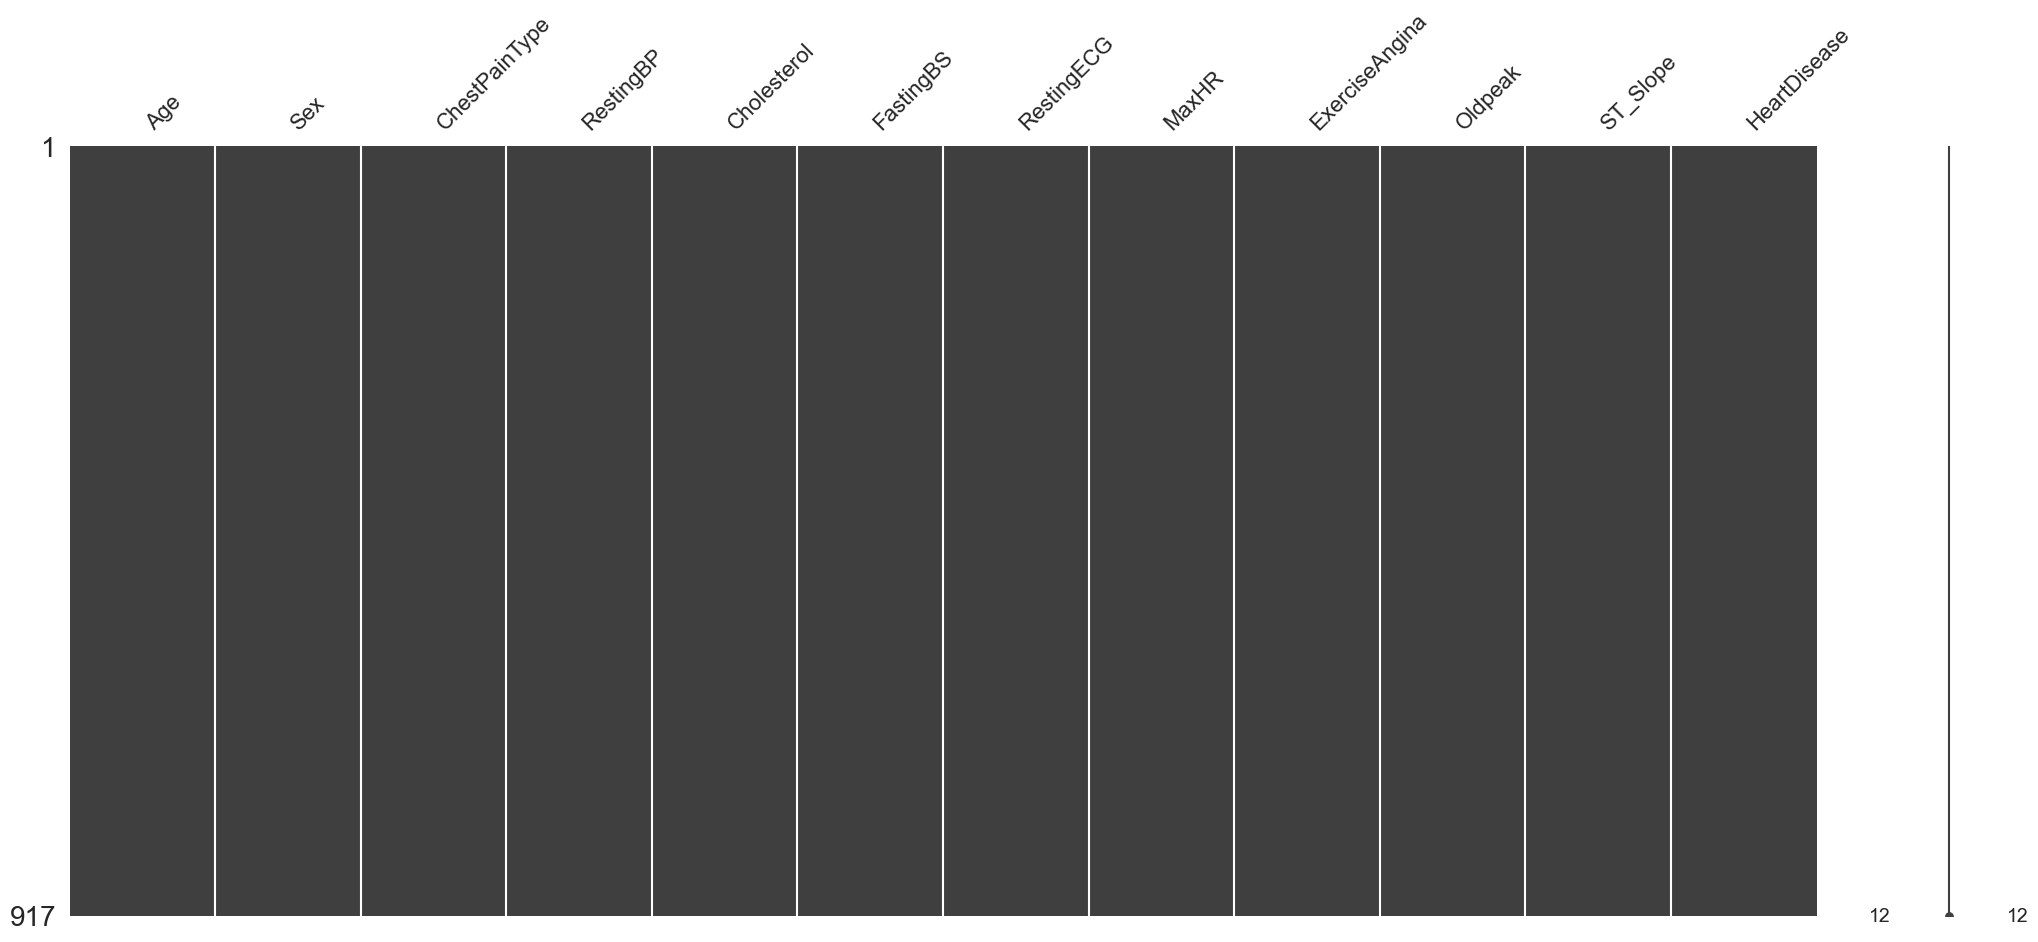

In [26]:
import missingno as msno
msno.matrix(heart)
plt.show()

In [27]:
for col in heart:
    print(col)

Age
Sex
ChestPainType
RestingBP
Cholesterol
FastingBS
RestingECG
MaxHR
ExerciseAngina
Oldpeak
ST_Slope
HeartDisease


In [28]:
heart[heart['HeartDisease'] == 0].describe().T.style.background_gradient(subset=['mean',
                                                                                'std',
                                                                                '50%','count'],
                                                                         cmap='coolwarm')

,count,mean,std,min,25%,50%,75%,max
Age,410.000000,50.551220,9.444915,28.000000,43.000000,51.000000,57.000000,76.000000
RestingBP,410.000000,130.180488,16.499585,80.000000,120.000000,130.000000,140.000000,190.000000
Cholesterol,410.000000,238.682927,54.024598,85.000000,204.000000,235.000000,266.750000,564.000000
FastingBS,410.000000,0.107317,0.309894,0.000000,0.000000,0.000000,0.000000,1.000000
MaxHR,410.000000,148.151220,23.288067,69.000000,134.000000,150.000000,165.000000,202.000000
Oldpeak,410.000000,0.408049,0.699709,-1.100000,0.000000,0.000000,0.600000,4.200000
HeartDisease,410.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [29]:
heart[heart['HeartDisease'] == 1].describe().T.style.background_gradient(subset=['mean',
                                                                                'std',
                                                                                '50%','count'],
                                                                         cmap='coolwarm')

,count,mean,std,min,25%,50%,75%,max
Age,507.000000,55.901381,8.735583,31.000000,51.000000,57.000000,62.000000,77.000000
RestingBP,507.000000,134.449704,18.928797,92.000000,120.000000,132.000000,145.000000,200.000000
Cholesterol,507.000000,246.873767,52.713521,100.000000,225.000000,237.000000,267.000000,603.000000
FastingBS,507.000000,0.335306,0.472563,0.000000,0.000000,0.000000,1.000000,1.000000
MaxHR,507.000000,127.601578,23.378376,60.000000,112.000000,126.000000,144.000000,195.000000
Oldpeak,507.000000,1.273767,1.152966,-2.600000,0.000000,1.200000,2.000000,6.200000
HeartDisease,507.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [31]:
def highlight_min(s, props=''):
    return np.where(s == np.nanmin(s.values), props, '')
heart.describe().style.apply(highlight_min, props='color:Black;background-color:Pink', axis=0)

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000
mean,53.509269,132.540894,243.211559,0.233370,136.789531,0.886696,0.552890
std,9.437636,17.999749,53.430044,0.423206,25.467129,1.066960,0.497466
min,28.000000,80.000000,85.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,214.000000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,237.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [33]:
#Summary statistics of categorical columns
heart.describe(include = [object])

,Sex,ChestPainType,RestingECG,ExerciseAngina,ST_Slope
count,917,917,917,917,917
unique,2,4,3,2,3
top,M,ASY,Normal,N,Flat
freq,724,496,551,546,459


In [34]:
heart.corr().unstack().sort_values(ascending=False).drop_duplicates()

Age           Age             1.000
Oldpeak       HeartDisease    0.404
HeartDisease  Age             0.282
FastingBS     HeartDisease    0.268
RestingBP     Age             0.263
Age           Oldpeak         0.259
              FastingBS       0.198
Oldpeak       RestingBP       0.174
HeartDisease  RestingBP       0.118
RestingBP     Cholesterol     0.086
HeartDisease  Cholesterol     0.076
FastingBS     RestingBP       0.068
Oldpeak       Cholesterol     0.055
              FastingBS       0.053
Cholesterol   Age             0.046
FastingBS     Cholesterol     0.025
MaxHR         Cholesterol    -0.002
              RestingBP      -0.110
              FastingBS      -0.131
Oldpeak       MaxHR          -0.161
MaxHR         Age            -0.382
              HeartDisease   -0.401
dtype: float64

In [35]:
heart.corr()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
Age,1.000,0.263,0.046,0.198,-0.382,0.259,0.282
RestingBP,0.263,1.000,0.086,0.068,-0.110,0.174,0.118
Cholesterol,0.046,0.086,1.000,0.025,-0.002,0.055,0.076
FastingBS,0.198,0.068,0.025,1.000,-0.131,0.053,0.268
MaxHR,-0.382,-0.110,-0.002,-0.131,1.000,-0.161,-0.401
Oldpeak,0.259,0.174,0.055,0.053,-0.161,1.000,0.404
HeartDisease,0.282,0.118,0.076,0.268,-0.401,0.404,1.000


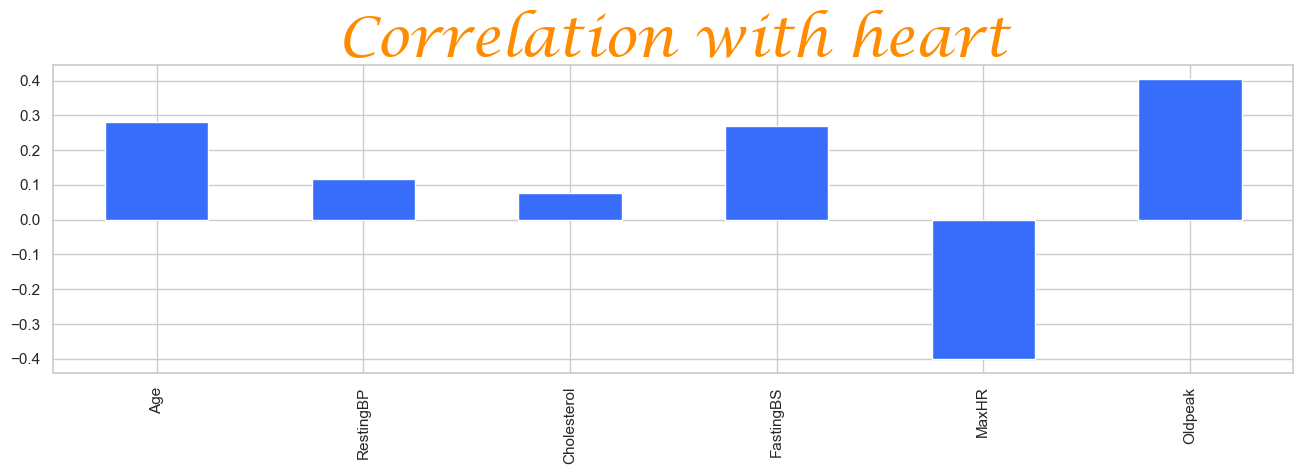

In [36]:
#Correlation with response variable class
X = heart.drop(['HeartDisease'], axis=1)
y = heart['HeartDisease']

X.corrwith(y).plot.bar(figsize=(16, 4), rot=90, grid=True)
plt.title('Correlation with heart',
         fontsize=25,
         color='DarkOrange',
         font='Lucida Calligraphy')
plt.show()

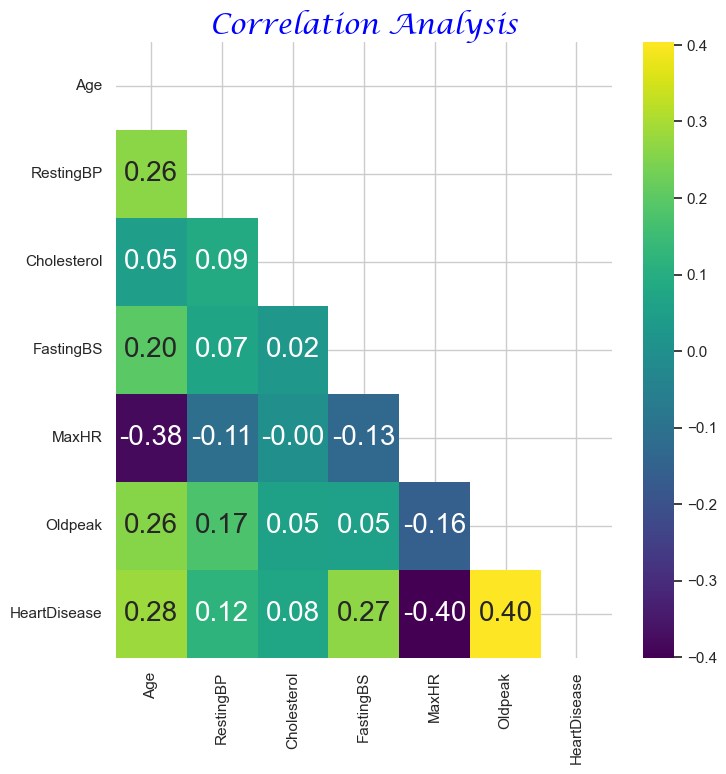

In [38]:
matplotlib.rcParams.update({'font.size' : 20})

corr = heart.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))

plt.figure(dpi=100)
plt.title('Correlation Analysis',
         fontsize=25,
         color='Blue',
         font='Lucida Calligraphy')
sns.heatmap(corr,
            mask=mask,
            annot=True,
            lw=0,
            linecolor='white',
            cmap='viridis',
            fmt="0.2f")
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.show()

In [39]:
for col in heart[categorical]:
    print(heart[categorical][col].value_counts())
    print("****"*10)

M    724
F    193
Name: Sex, dtype: int64
****************************************
ASY    496
NAP    202
ATA    173
TA      46
Name: ChestPainType, dtype: int64
****************************************
Normal    551
LVH       188
ST        178
Name: RestingECG, dtype: int64
****************************************
N    546
Y    371
Name: ExerciseAngina, dtype: int64
****************************************
Flat    459
Up      395
Down     63
Name: ST_Slope, dtype: int64
****************************************


In [40]:
skew_limit = 0.75
skew_vals = heart[numerical].skew()
skew_cols= skew_vals[abs(skew_vals)> skew_limit].sort_values(ascending=False)
skew_cols

Cholesterol    1.446
FastingBS      1.263
Oldpeak        1.025
dtype: float64

Text(0.5, 1.0, 'Oldpeak')

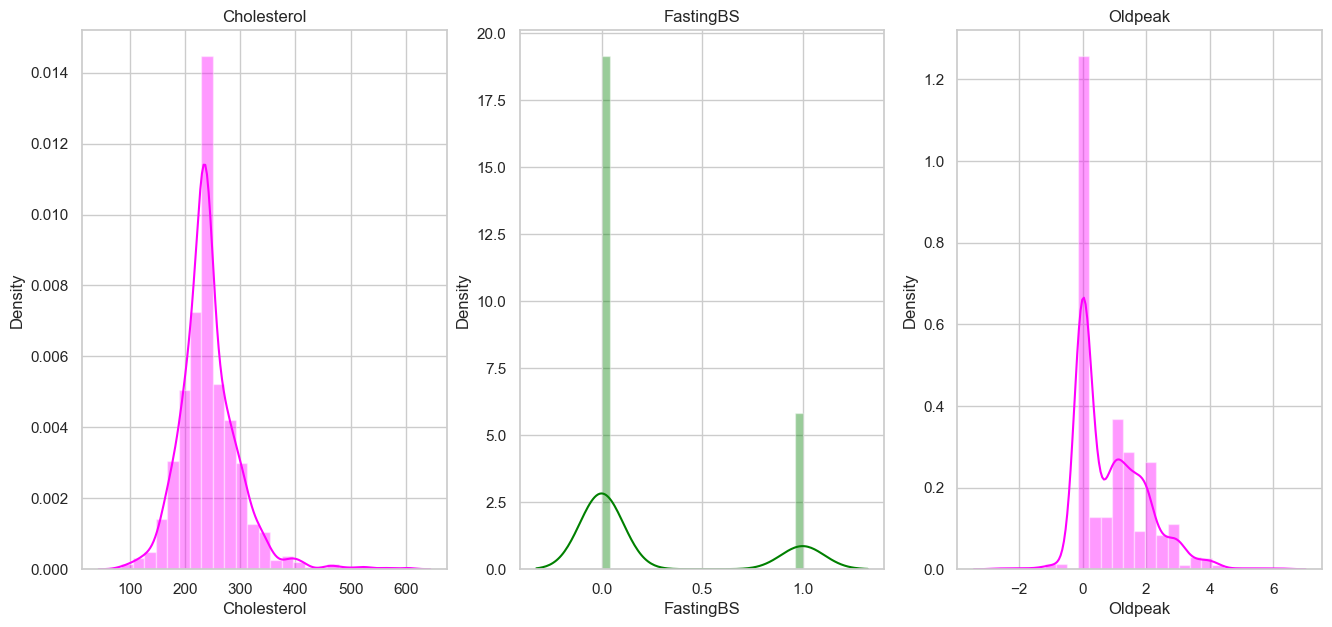

In [41]:
plt.figure(figsize=(16, 7))

plt.subplot(131)
sns.distplot(heart["Cholesterol"], bins=25, color="magenta", label="Skewness : %.2f"%(heart["Cholesterol"].skew()));
plt.title('Cholesterol')

plt.subplot(132)
sns.distplot(heart["FastingBS"], bins=25, color="green", label="Skewness : %.2f"%(heart["Cholesterol"].skew()));
plt.title('FastingBS')

plt.subplot(133)
sns.distplot(heart["Oldpeak"], bins=25, color="magenta", label="Skewness : %.2f"%(heart["Cholesterol"].skew()));
plt.title('Oldpeak')

In [47]:
#Value and percetage count
def percent_counts(df, feature):
    total = df.loc[:,feature].value_counts(dropna=False)
    percent = round(df.loc[:,feature].value_counts(dropna=False, normalize=True)*100,2)
    percent_count = pd.concat([total, percent], keys=['Total', 'Percentage'], axis = 1)
    
    return percent_count

In [48]:
#Sex percentage distibution count
percent_counts(heart, 'Sex').style.background_gradient(cmap='coolwarm').set_precision(2)

,Total,Percentage
M,724,78.95
F,193,21.05


Text(0, 0.5, 'Count')

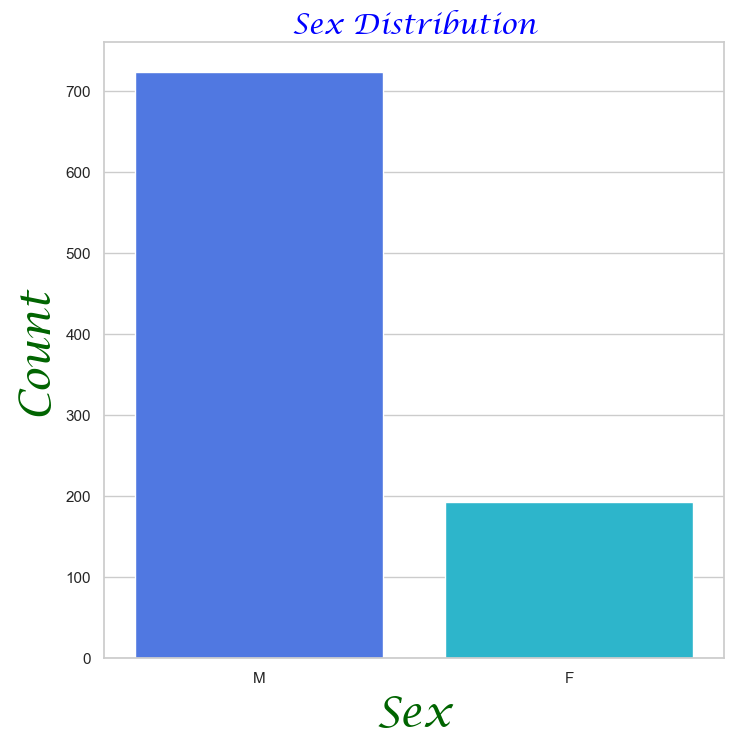

In [49]:
sns.countplot(data=heart, x='Sex');
plt.title('Sex Distribution', fontsize = 40, color='Blue', font='Lucida calligraphy')
plt.xlabel('Sex', fontsize = 30, color='DarkGreen', font='Lucida Calligraphy')
plt.ylabel('Count', fontsize = 30, color='Darkgreen', font='Lucida Calligraphy')

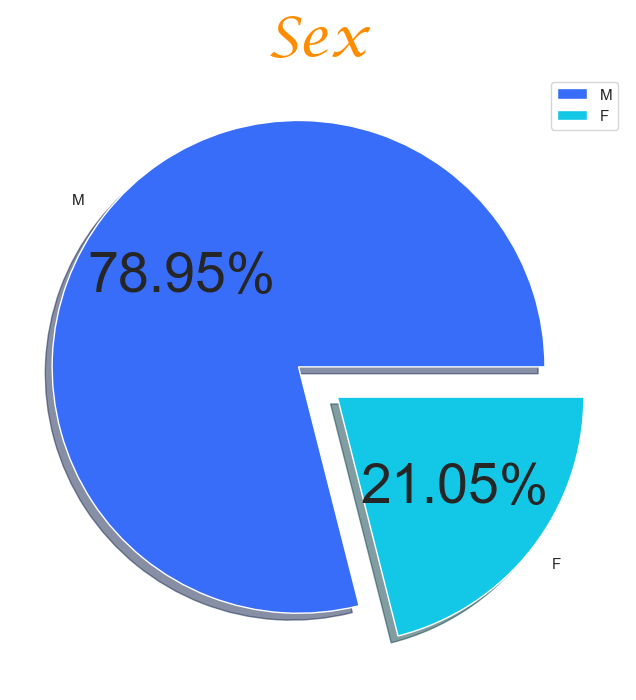

In [52]:
matplotlib.rcParams.update({'font.size' : 40})
ax=heart['Sex'].value_counts().plot.pie(explode=[0.1, 0.1], autopct='%1.2f%%', shadow=True);
ax.set_title(label = "Sex", fontsize = 40,color='DarkOrange', font='Lucida Calligraphy');
plt.legend(labels=['M', 'F'])
plt.axis('off');

In [53]:
#Chest pain percentage distribution count
percent_counts(heart, 'ChestPainType').style.background_gradient(cmap='coolwarm').set_precision(2)

,Total,Percentage
ASY,496,54.09
NAP,202,22.03
ATA,173,18.87
TA,46,5.02


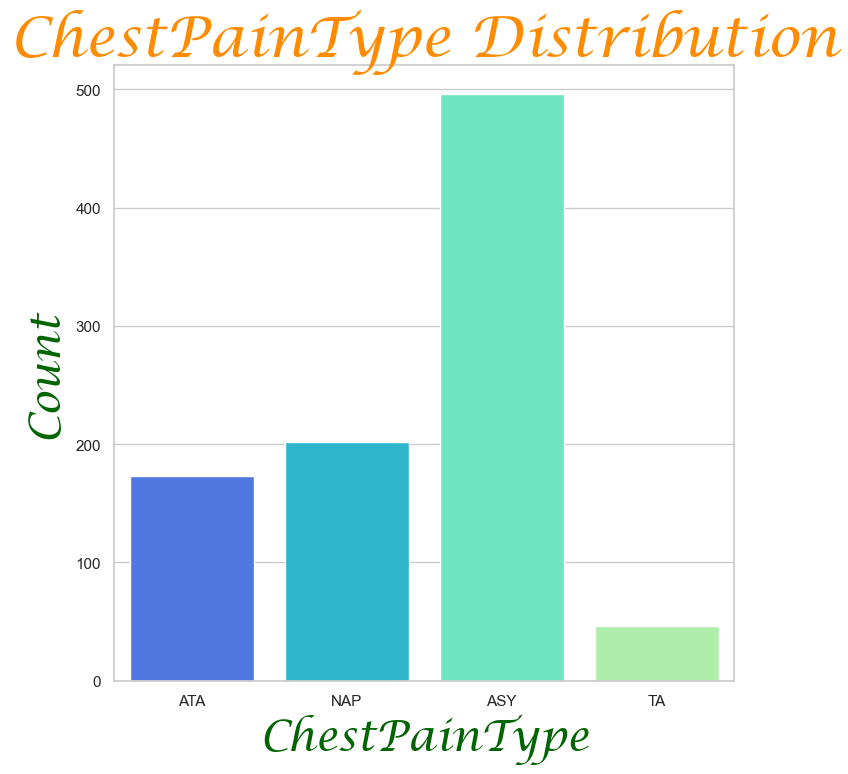

In [54]:
sns.countplot(data=heart, x='ChestPainType');
plt.title('ChestPainType Distribution', fontsize = 40, color='DarkOrange', font='Lucida calligraphy')
plt.xlabel('ChestPainType', fontsize = 30, color='DarkGreen', font='Lucida Calligraphy')
plt.ylabel('Count', fontsize = 30, color='DarkGreen', font='Lucida Calligraphy');

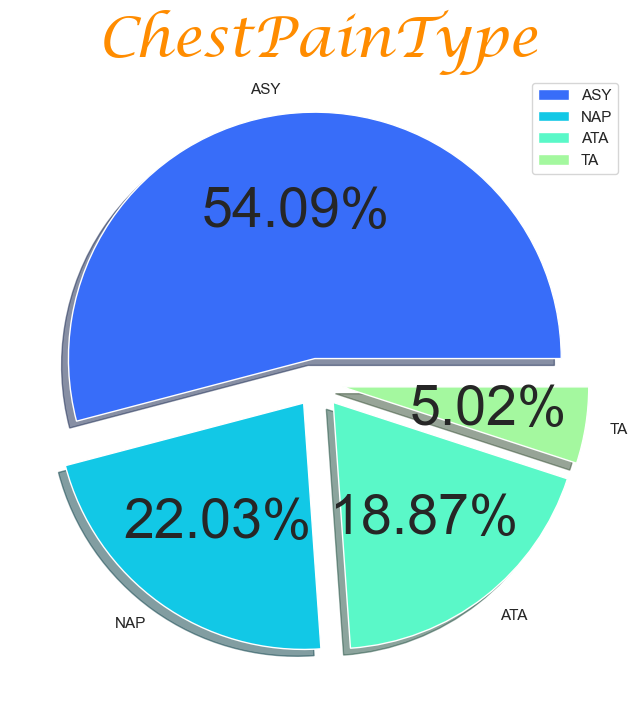

In [55]:
ax=heart['ChestPainType'].value_counts().plot.pie(explode=[0.1,0.1,0.1,0.1], autopct='%1.2f%%',
                                                  shadow=True)
ax.set_title(label = "ChestPainType", fontsize = 40, color='DarkOrange', font='Lucida Calligraphy')
plt.legend(labels=['ASY', 'NAP', 'ATA', 'TA'])
plt.axis('off');

In [56]:
#RestingECG percentage distribution count
percent_counts(heart,'RestingECG').style.background_gradient(cmap='coolwarm').set_precision(2)

,Total,Percentage
Normal,551,60.09
LVH,188,20.50
ST,178,19.41


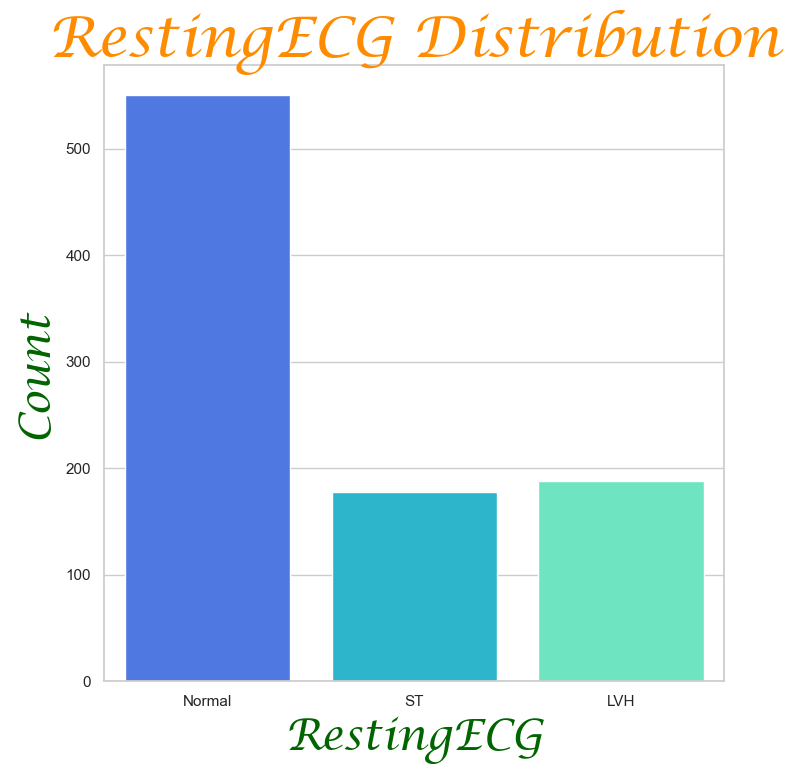

In [59]:
sns.countplot(data=heart, x='RestingECG');
plt.title('RestingECG Distribution', fontsize = 40, color='DarkOrange', font='Lucida Calligraphy')
plt.xlabel('RestingECG', fontsize = 30, color='DarkGreen', font='Lucida Calligraphy')
plt.ylabel('Count', fontsize = 30, color='DarkGreen', font='Lucida Calligraphy');

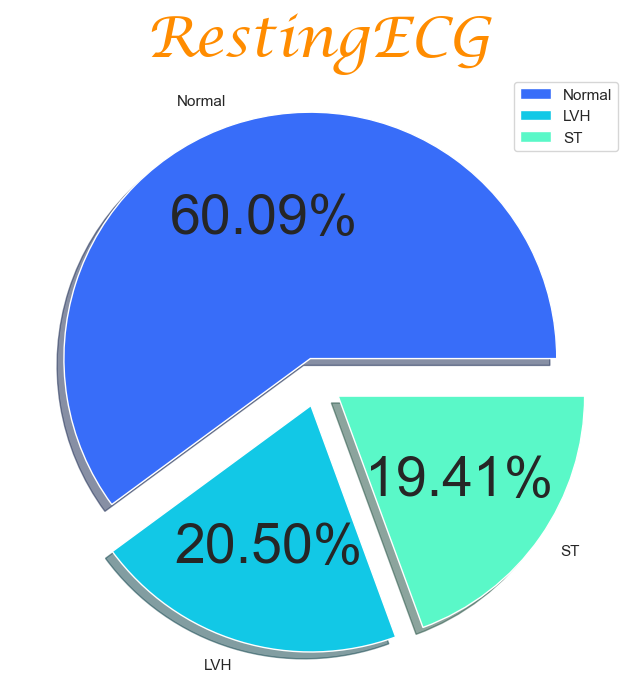

In [61]:
ax=heart['RestingECG'].value_counts().plot.pie(explode=[0.1,0.1,0.1], autopct='%1.2f%%', shadow=True)
ax.set_title(label = "RestingECG", fontsize = 40, color='DarkOrange', font='Lucida Calligraphy')
plt.legend(labels=['Normal', 'LVH', 'ST'])
plt.axis('off');

In [63]:
percent_counts(heart, 'ExerciseAngina').style.background_gradient(cmap='coolwarm').set_precision(2)

,Total,Percentage
N,546,59.54
Y,371,40.46


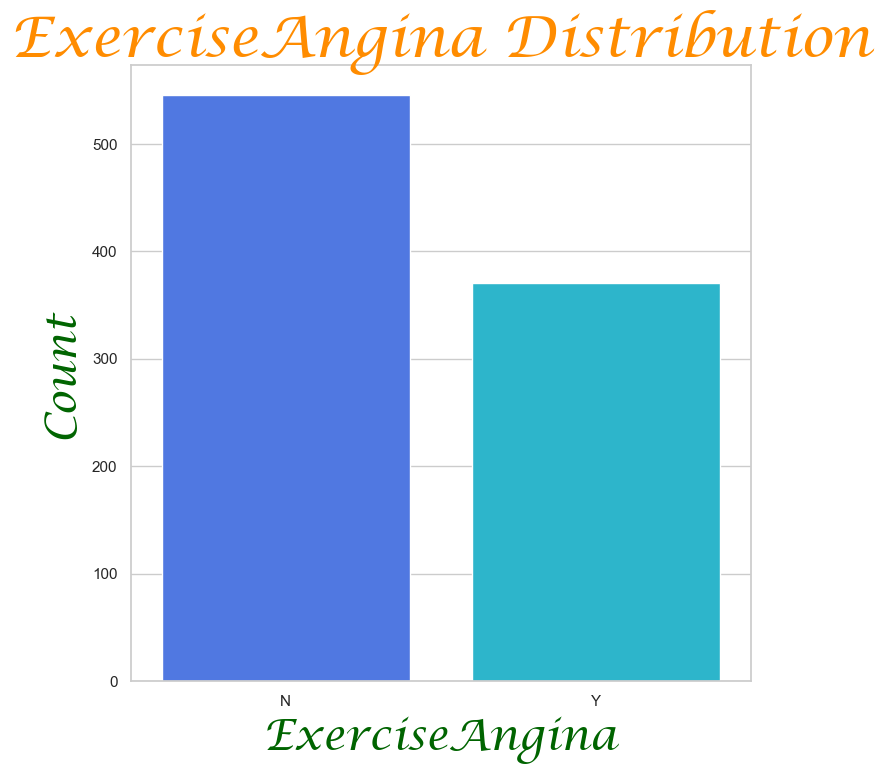

In [65]:
sns.countplot(data=heart,x='ExerciseAngina');
plt.title('ExerciseAngina Distribution', fontsize = 40, color ='DarkOrange', font='Lucida Calligraphy')
plt.xlabel('ExerciseAngina', fontsize = 30, color='DarkGreen', font='Lucida Calligraphy')
plt.ylabel('Count', fontsize = 30, color='DarkGreen', font='Lucida Calligraphy');

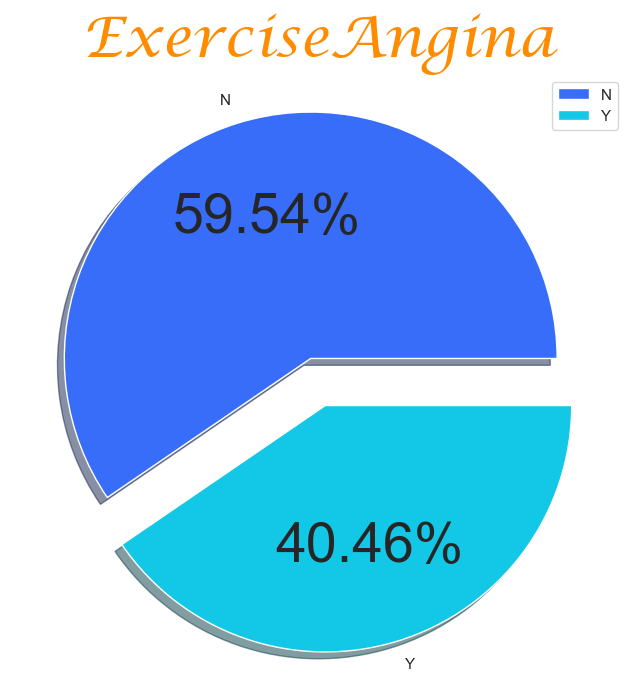

In [66]:
ax=heart['ExerciseAngina'].value_counts().plot.pie(explode=[0.1, 0.1],autopct='%1.2f%%',shadow=True);
ax.set_title(label = "ExerciseAngina", fontsize = 40,color='DarkOrange',font='Lucida Calligraphy');
plt.legend(labels=['N','Y'])
plt.axis('off');

In [68]:
#ST_slope percentage distribution count
percent_counts(heart, 'ST_Slope').style.background_gradient(cmap='coolwarm').set_precision(2)


,Total,Percentage
Flat,459,50.05
Up,395,43.08
Down,63,6.87


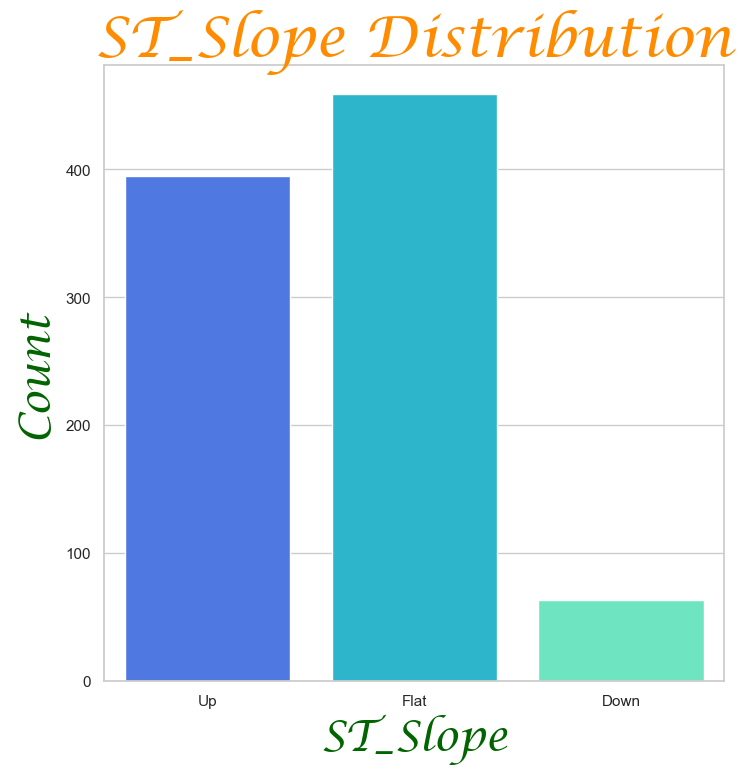

In [69]:
sns.countplot(data=heart, x='ST_Slope');
plt.title('ST_Slope Distribution', fontsize = 30, color='DarkOrange', font='Lucida Calligraphy')
plt.xlabel('ST_Slope', fontsize = 30, color='DarkGreen', font='Lucida Calligraphy')
plt.ylabel('Count', fontsize = 30, color='DarkGreen', font='Lucida Calligraphy');

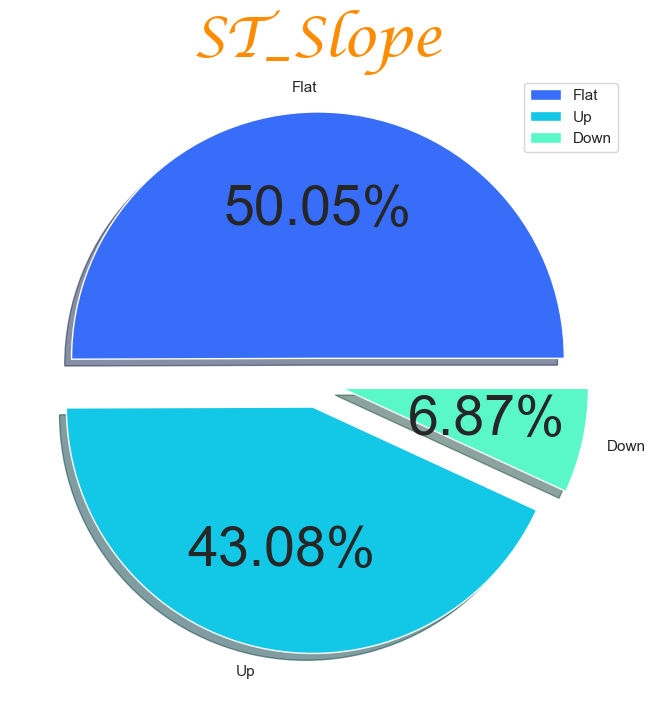

In [70]:
ax=heart['ST_Slope'].value_counts().plot.pie(explode=[0.1,0.1,0.1], autopct='%1.2f%%', shadow=True);
ax.set_title(label = "ST_Slope", fontsize = 40, color='DarkOrange', font='Lucida Calligraphy');
plt.legend(labels=['Flat', 'Up', 'Down'])
plt.axis('off');

In [71]:
from IPython.core.display import HTML
def multi_table(table_list):
    
    return HTML(
        '<table><tr style="background-color:Aqua;">' + 
        ''.join(['<td>' + table._repr_html_() + '</td>' for table in table_list]) + 
        '</tr></table>')
df_groupby = {var: pd.DataFrame(heart.groupby([var, 'HeartDisease']).size())
             for var in {'Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope'}}
multi_table([df_groupby['ChestPainType'], df_groupby['Sex'], df_groupby['RestingECG'], df_groupby['ExerciseAngina'], df_groupby['ST_Slope']])

In [72]:
#Categorical feature (Sex, ChestPainType, RestingECG, ExerciseAngina, ST_Slope) is converted into numerical feature by using pandas dummy method
heart = pd.get_dummies(heart,columns=['Sex','ChestPainType','RestingECG','ExerciseAngina','ST_Slope'],drop_first=True)
heart.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
0,40,140,289.0,0,172,0.0,0,1,1,0,0,1,0,0,0,1
1,49,160,180.0,0,156,1.0,1,0,0,1,0,1,0,0,1,0
2,37,130,283.0,0,98,0.0,0,1,1,0,0,0,1,0,0,1
3,48,138,214.0,0,108,1.5,1,0,0,0,0,1,0,1,1,0
4,54,150,195.0,0,122,0.0,0,1,0,1,0,1,0,0,0,1


In [73]:
#Train test split
X = heart.drop(['HeartDisease'], axis=1)
y = heart['HeartDisease']

In [76]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=21)

In [77]:
#Standardizing the data by using standardScaler, scaling dataset with robust scaler
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()
std_scaler.fit(X)
X_train_std=std_scaler.transform(X_train)
X_test_std=std_scaler.transform(X_test)

display(X_train.head())
display(X_test.head())

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
4,54,150,195.0,0,122,0.0,1,0,1,0,1,0,0,0,1
234,54,140,309.0,0,140,0.0,0,1,0,0,0,1,0,0,1
872,55,132,353.0,0,132,1.2,1,0,0,0,1,0,1,1,0
61,43,150,254.0,0,175,0.0,0,0,1,0,1,0,0,0,1
166,50,140,231.0,0,140,5.0,1,0,0,0,0,1,1,1,0


,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
199,57,130,308.0,0,98,1.0,0,0,0,1,1,0,0,1,0
44,43,120,175.0,0,120,1.0,1,0,0,0,1,0,1,1,0
103,40,120,466.0,1,152,1.0,1,0,0,0,1,0,1,1,0
852,43,120,177.0,0,120,2.5,1,0,0,0,0,0,1,1,0
480,58,126,237.0,1,110,2.0,1,1,0,0,1,0,1,1,0


In [78]:
#Model Implementation (Logistic Regression)
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred_log = logreg.predict(X_test)

log_train = round(logreg.score(X_train, y_train) * 100, 2)
log_accuracy = round(accuracy_score(y_pred_log, y_test) * 100, 2)
log_f1 = round(f1_score(y_pred_log, y_test) * 100, 2)

print("Training Accuracy :", log_train,"%")
print("Model Accuracy Score :", log_accuracy, "%")
print("Confusion Matrix: \n", confusion_matrix(y_test,y_pred_log))
print("Classification_Report: \n", classification_report(y_test,y_pred_log))

Training Accuracy : 86.77 %
Model Accuracy Score : 85.87 %
Confusion Matrix: 
 [[62 14]
 [12 96]]
Classification_Report: 
               precision    recall  f1-score   support

           0       0.84      0.82      0.83        76
           1       0.87      0.89      0.88       108

    accuracy                           0.86       184
   macro avg       0.86      0.85      0.85       184
weighted avg       0.86      0.86      0.86       184



In [79]:
#Model Accuraacy score with K-fold Cross validation
from sklearn.model_selection import cross_val_score
val_score = cross_val_score(estimator=logreg, X = X_train, y=y_train, cv=10)
print("Model Accuracy Score: {:.2f}%".format(val_score.mean()*100))
print("Std. Dev: {:.2f}%".format(val_score.std()*100))

Model Accuracy Score: 85.80%
Std. Dev: 3.06%


In [80]:
#Using vector machines
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train, y_train)
y_pred_svc = svc.predict(X_test)

svc_train = round(svc.score(X_train, y_train) * 100, 2)
svc_accuracy = round(accuracy_score(y_pred_svc, y_test) * 100, 2)
svc_f1 = round(f1_score(y_pred_svc, y_test) * 100, 2)

print("Training Accuracy     :",svc_train,"%")
print("Model Accuracy Score  :",svc_accuracy,"%")
print("Confusion Matrix: \n",confusion_matrix(y_test,y_pred_svc))
print("Classification_Report: \n",classification_report(y_test,y_pred_svc))

Training Accuracy     : 70.8 %
Model Accuracy Score  : 65.76 %
Confusion Matrix: 
 [[44 32]
 [31 77]]
Classification_Report: 
               precision    recall  f1-score   support

           0       0.59      0.58      0.58        76
           1       0.71      0.71      0.71       108

    accuracy                           0.66       184
   macro avg       0.65      0.65      0.65       184
weighted avg       0.66      0.66      0.66       184



In [81]:
#Model Accuracy score with k-fol cross validation
from sklearn.model_selection import cross_val_score
val_score = cross_val_score(estimator=svc, X = X_train, y=y_train, cv=10)
print("Model Accuracy Score: {:.2f}%".format(val_score.mean()*100))
print("Std. Dev: {:.2f}%".format(val_score.std()*100))

Model Accuracy Score: 69.71%
Std. Dev: 4.37%


In [82]:
#Using KN Claasiffier
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

knn_train = round(knn.score(X_train, y_train) * 100, 2)
knn_accuracy = round(accuracy_score(y_pred_knn, y_test) * 100, 2)
knn_f1 = round(f1_score(y_pred_knn, y_test) * 100, 2)

print("Training Accuracy     :",knn_train,"%")
print("Model Accuracy Score  :",knn_accuracy,"%")
print("Confusion Matrix: \n",confusion_matrix(y_test,y_pred_knn))
print("Classification_Report: \n",classification_report(y_test,y_pred_knn))

Training Accuracy     : 82.81 %
Model Accuracy Score  : 65.76 %
Confusion Matrix: 
 [[48 28]
 [35 73]]
Classification_Report: 
               precision    recall  f1-score   support

           0       0.58      0.63      0.60        76
           1       0.72      0.68      0.70       108

    accuracy                           0.66       184
   macro avg       0.65      0.65      0.65       184
weighted avg       0.66      0.66      0.66       184



In [83]:
#Model Accuracy score with K-Fold cross validation
from sklearn.model_selection import cross_val_score
val_score = cross_val_score(estimator=knn, X=X_train, y=y_train, cv=10)
print("Model Accuracy Score: {:.2f}%".format(val_score.mean()*100))
print("Std. Dev: {:.2f}%".format(val_score.std()*100))

Model Accuracy Score: 67.51%
Std. Dev: 6.01%


In [84]:
#Using GussianNB
from sklearn.naive_bayes import GaussianNB
gaussian = GaussianNB()
gaussian.fit(X_train, y_train)
y_pred_NB = gaussian.predict(X_test)

gaussian_train = round(gaussian.score(X_train, y_train) * 100, 2)
gaussian_accuracy = round(accuracy_score(y_pred_NB, y_test) * 100, 2)
gaussian_f1 = round(f1_score(y_pred_NB, y_test) * 100, 2)

print("Training Accuracy     :",gaussian_train,"%")
print("Model Accuracy Score  :",gaussian_accuracy,"%")
print("Confusion Matrix: \n",confusion_matrix(y_test,y_pred_NB))
print("Classification_Report: \n",classification_report(y_test,y_pred_NB))

Training Accuracy     : 86.36 %
Model Accuracy Score  : 82.61 %
Confusion Matrix: 
 [[60 16]
 [16 92]]
Classification_Report: 
               precision    recall  f1-score   support

           0       0.79      0.79      0.79        76
           1       0.85      0.85      0.85       108

    accuracy                           0.83       184
   macro avg       0.82      0.82      0.82       184
weighted avg       0.83      0.83      0.83       184



In [85]:
from sklearn.model_selection import cross_val_score
val_score = cross_val_score(estimator=gaussian, X = X_train, y=y_train, cv=10)
print("Model Accuracy Score: {:.2f} %".format(val_score.mean()*100))
print("Std. Dev: {:.2f} %".format(val_score.std()*100))

Model Accuracy Score: 85.39 %
Std. Dev: 3.71 %


In [87]:
from sklearn.linear_model import Perceptron
perceptron = Perceptron()
perceptron.fit(X_train, y_train)
y_pred_perceptron = perceptron.predict(X_test)

perceptron_train = round(perceptron.score(X_train, y_train) * 100, 2)
perceptron_accuracy = round(accuracy_score(y_pred_perceptron, y_test) * 100, 2)
perceptron_f1 = round(f1_score(y_pred_perceptron, y_test) * 100, 2)

print("Training Accuracy    :",perceptron_train,"%")
print("Model Accuracy Score :",perceptron_accuracy,"%")
print("Confusion Matrix: \n",confusion_matrix(y_test,y_pred_perceptron))
print("Classification_Report: \n",classification_report(y_test,y_pred_perceptron))

Training Accuracy    : 57.16 %
Model Accuracy Score : 60.87 %
Confusion Matrix: 
 [[  5  71]
 [  1 107]]
Classification_Report: 
               precision    recall  f1-score   support

           0       0.83      0.07      0.12        76
           1       0.60      0.99      0.75       108

    accuracy                           0.61       184
   macro avg       0.72      0.53      0.44       184
weighted avg       0.70      0.61      0.49       184



In [88]:
#mModel Accuracy for perception using K-fold cross validation
from sklearn.model_selection import cross_val_score
val_score = cross_val_score(estimator=perceptron, X = X_train, y=y_train, cv=10)
print("Model Accuracy Score: {:.2f} %".format(val_score.mean()*100))
print("Std. Dev: {:.2f} %".format(val_score.std()*100))

Model Accuracy Score: 60.87 %
Std. Dev: 7.40 %


In [90]:
from sklearn.svm import LinearSVC
linear_svc = LinearSVC()
linear_svc.fit(X_train, y_train)
y_pred_LinearSVC = linear_svc.predict(X_test)

linear_svc_train = round(linear_svc.score(X_train, y_train) * 100, 2)
linear_svc_accuracy = round(accuracy_score(y_pred_LinearSVC, y_test) * 100, 2)
linear_svc_f1 = round(f1_score(y_pred_LinearSVC, y_test) * 100, 2)

print("Training Accuracy    :",linear_svc_train,"%")
print("Model Accuracy Score :",linear_svc_accuracy,"%")
print("Confusion Matrix: \n",confusion_matrix(y_test,y_pred_LinearSVC))
print("Classification_Report: \n",classification_report(y_test,y_pred_LinearSVC))

Training Accuracy    : 83.63 %
Model Accuracy Score : 83.15 %
Confusion Matrix: 
 [[ 52  24]
 [  7 101]]
Classification_Report: 
               precision    recall  f1-score   support

           0       0.88      0.68      0.77        76
           1       0.81      0.94      0.87       108

    accuracy                           0.83       184
   macro avg       0.84      0.81      0.82       184
weighted avg       0.84      0.83      0.83       184



In [91]:
#Model accuracy for Linear SVC
from sklearn.model_selection import cross_val_score
val_score = cross_val_score(estimator=linear_svc, X = X_train, y=y_train, cv=10)
print("Model Accuracy Score: {:.2f} %".format(val_score.mean()*100))
print("Std. Dev: {:.2f} %".format(val_score.std()*100))

Model Accuracy Score: 76.35 %
Std. Dev: 14.19 %


In [92]:
from sklearn.linear_model import SGDClassifier
sgd = SGDClassifier()
sgd.fit(X_train, y_train)
y_pred_SGD = sgd.predict(X_test)

sgd_train = round(sgd.score(X_train, y_train) * 100, 2)
sgd_accuracy = round(accuracy_score(y_pred_SGD, y_test) * 100, 2)
sgd_f1 = round(f1_score(y_pred_SGD, y_test) * 100, 2)

print("Training Accuracy     :",sgd_train,"%")
print("Model Accuracy Score  :",sgd_accuracy,"%")
print("Confusion Matrix: \n",confusion_matrix(y_test,y_pred_SGD))
print("Classification_Report: \n",classification_report(y_test,y_pred_SGD))

Training Accuracy     : 68.35 %
Model Accuracy Score  : 71.2 %
Confusion Matrix: 
 [[33 43]
 [10 98]]
Classification_Report: 
               precision    recall  f1-score   support

           0       0.77      0.43      0.55        76
           1       0.70      0.91      0.79       108

    accuracy                           0.71       184
   macro avg       0.73      0.67      0.67       184
weighted avg       0.72      0.71      0.69       184



In [93]:
#Model Accuracy with the use of SGDClassifier
from sklearn.model_selection import cross_val_score
val_score = cross_val_score(estimator=sgd, X = X_train, y=y_train, cv=10)
print("Model Accuracy Score: {:.2f} %".format(val_score.mean()*100))
print("Std. Dev: {:.2f} %".format(val_score.std()*100))

Model Accuracy Score: 60.86 %
Std. Dev: 8.81 %


In [94]:
#Using decision tree classifier
from sklearn.tree import DecisionTreeClassifier
decision = DecisionTreeClassifier()
decision.fit(X_train, y_train)
y_pred_Decision = decision.predict(X_test)

decision_train = round(decision.score(X_train, y_train) * 100, 2)
decision_accuracy = round(accuracy_score(y_pred_Decision, y_test) * 100, 2)
decision_f1 = round(f1_score(y_pred_Decision, y_test) * 100, 2)

print("Training Accuracy     :",decision_train,"%")
print("Model Accuracy Score  :",decision_accuracy,"%")
print("Confusion Matrix: \n",confusion_matrix(y_test,y_pred_Decision))
print("Classification_Report: \n",classification_report(y_test,y_pred_Decision))

Training Accuracy     : 100.0 %
Model Accuracy Score  : 74.46 %
Confusion Matrix: 
 [[49 27]
 [20 88]]
Classification_Report: 
               precision    recall  f1-score   support

           0       0.71      0.64      0.68        76
           1       0.77      0.81      0.79       108

    accuracy                           0.74       184
   macro avg       0.74      0.73      0.73       184
weighted avg       0.74      0.74      0.74       184



In [95]:
#Model Accuracy for Decision tree classifier
from sklearn.model_selection import cross_val_score
val_score = cross_val_score(estimator=decision, X = X_train, y=y_train, cv=10)
print("Model Accuracy Score: {:.2f} %".format(val_score.mean()*100))
print("Std. Dev: {:.2f} %".format(val_score.std()*100))

Model Accuracy Score: 78.71 %
Std. Dev: 3.11 %


In [96]:
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)
y_pred_random = random_forest.predict(X_test)
random_forest.score(X_train, y_train)

random_forest_train = round(random_forest.score(X_train, y_train) * 100, 2)
random_forest_accuracy = round(accuracy_score(y_pred_random, y_test) * 100, 2)
random_forest_f1 = round(f1_score(y_pred_random, y_test) * 100, 2)

print("Training Accuracy     :",random_forest_train,"%")
print("Model Accuracy Score  :",random_forest_accuracy,"%")
print("Confusion Matrix: \n",confusion_matrix(y_test,y_pred_random))
print("Classification_Report: \n",classification_report(y_test,y_pred_random))

Training Accuracy     : 100.0 %
Model Accuracy Score  : 86.96 %
Confusion Matrix: 
 [[62 14]
 [10 98]]
Classification_Report: 
               precision    recall  f1-score   support

           0       0.86      0.82      0.84        76
           1       0.88      0.91      0.89       108

    accuracy                           0.87       184
   macro avg       0.87      0.86      0.86       184
weighted avg       0.87      0.87      0.87       184



In [97]:
#Model accuracy with the use of random forest classifier
from sklearn.model_selection import cross_val_score
val_score = cross_val_score(estimator=random_forest, X = X_train, y=y_train, cv=10)
print("Model Accuracy Score: {:.2f} %".format(val_score.mean()*100))
print("Std. Dev: {:.2f} %".format(val_score.std()*100))

Model Accuracy Score: 85.93 %
Std. Dev: 3.55 %


In [99]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier()
mlp.fit(X_train,y_train)
y_pred_MLP = mlp.predict(X_test)
mlp.score(X_train, y_train)

mlp_train = round(mlp.score(X_train, y_train) * 100, 2)
mlp_accuracy = round(accuracy_score(y_pred_MLP, y_test) * 100, 2)
mlp_f1 = round(f1_score(y_pred_MLP, y_test) * 100, 2)

print("Training Accuracy     :",mlp_train,"%")
print("Model Accuracy Score  :",mlp_accuracy,"%")
print("Confusion Matrix: \n",confusion_matrix(y_test,y_pred_MLP))
print("Classification_Report: \n",classification_report(y_test,y_pred_MLP))

Training Accuracy     : 87.04 %
Model Accuracy Score  : 84.24 %
Confusion Matrix: 
 [[58 18]
 [11 97]]
Classification_Report: 
               precision    recall  f1-score   support

           0       0.84      0.76      0.80        76
           1       0.84      0.90      0.87       108

    accuracy                           0.84       184
   macro avg       0.84      0.83      0.83       184
weighted avg       0.84      0.84      0.84       184



In [100]:
#model accuracy for MLPClassifier
from sklearn.model_selection import cross_val_score
val_score = cross_val_score(estimator=mlp, X = X_train, y=y_train, cv=10)
print("Model Accuracy Score: {:.2f} %".format(val_score.mean()*100))
print("Std. Dev: {:.2f} %".format(val_score.std()*100))

Model Accuracy Score: 84.84 %
Std. Dev: 4.69 %


In [102]:
#installed xgboost to make this code run (pip install xgboost)
import xgboost as Xgb
xgb = Xgb.XGBClassifier()
xgb.fit(X_train,y_train)
y_pred_xgb = xgb.predict(X_test)
xgb.score(X_train, y_train)

xgb_train = round(xgb.score(X_train, y_train) * 100, 2)
xgb_accuracy = round(accuracy_score(y_pred_xgb, y_test) * 100, 2)
xgb_f1 = round(f1_score(y_pred_xgb, y_test) * 100, 2)

print("Training Accuracy     :",xgb_train,"%")
print("Model Accuracy Score  :",xgb_accuracy,"%")
print("Confusion Matrix: \n",confusion_matrix(y_test,y_pred_xgb))
print("Classification_Report: \n",classification_report(y_test,y_pred_xgb))

Training Accuracy     : 100.0 %
Model Accuracy Score  : 85.87 %
Confusion Matrix: 
 [[60 16]
 [10 98]]
Classification_Report: 
               precision    recall  f1-score   support

           0       0.86      0.79      0.82        76
           1       0.86      0.91      0.88       108

    accuracy                           0.86       184
   macro avg       0.86      0.85      0.85       184
weighted avg       0.86      0.86      0.86       184



In [103]:
#model accuracy for xgboost
from sklearn.model_selection import cross_val_score
val_score = cross_val_score(estimator=xgb, X = X_train, y=y_train, cv=10)
print("Model Accuracy Score: {:.2f} %".format(val_score.mean()*100))
print("Std. Dev: {:.2f} %".format(val_score.std()*100))

Model Accuracy Score: 84.44 %
Std. Dev: 3.46 %


In [104]:
#COMPARING ALL MODELS
models = pd.DataFrame({
    'Model' :[
        'Logistic Regression','Support Vector Machines', 'KNeighborsClassifier', 
        'GaussianNB','Perceptron', 'Linear SVC','Stochastic Gradient Decent',
        'Decision Tree','Random Forest', 'MLPClassifier' ,'XGBClassifier'
    ],
    'Training Accuracy' : [
         log_train, svc_train, knn_train, gaussian_train, perceptron_train,
        linear_svc_train, sgd_train, decision_train, random_forest_train,
        mlp_train, xgb_train
    ],
    'Model Accuracy Score' : [
        log_accuracy, svc_accuracy, knn_accuracy, gaussian_accuracy, perceptron_accuracy,
        linear_svc_accuracy, sgd_accuracy, decision_accuracy, random_forest_accuracy,
        mlp_accuracy, xgb_accuracy
    ],
    'Model f1 Score' : [
         log_f1, svc_f1, knn_f1, gaussian_f1, perceptron_f1,
        linear_svc_f1, sgd_f1, decision_f1, random_forest_f1,
        mlp_f1, xgb_f1
    ]
})

In [105]:
models.sort_values(by='Model Accuracy Score', ascending=False)

,Model,Training Accuracy,Model Accuracy Score,Model f1 Score
8,Random Forest,100.00,86.96,89.09
0,Logistic Regression,86.77,85.87,88.07
10,XGBClassifier,100.00,85.87,88.29
9,MLPClassifier,87.04,84.24,87.00
5,Linear SVC,83.63,83.15,86.70
3,GaussianNB,86.36,82.61,85.19
7,Decision Tree,100.00,74.46,78.92
6,Stochastic Gradient Decent,68.35,71.20,78.71
1,Support Vector Machines,70.80,65.76,70.97
2,KNeighborsClassifier,82.81,65.76,69.86
